In [14]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

X_valid, X_train = x_train[:5000] / 255.0, x_train[5000:] / 255.0
y_valid, y_train = y_train[:5000], y_train[5000:]

X_train = X_train.reshape(-1, 784)
X_test = x_test.reshape(-1, 784)
X_valid = X_valid.reshape(-1, 784)


In [30]:
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

def create_model(optimizer = 'adam', activation = 'relu', neurons = 256):

    model = Sequential([
        Dense(neurons, activation=activation, input_shape=(784,)),
        Dropout(0.2),
        Dense(neurons, activation=activation),
        Dropout(0.2),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=optimizer,
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

    

    return(model)


__1. Підбір оптимізаторів__

In [24]:
optimizer = ['SGD', 'RMSprop', 'Adagrad',
             'Adadelta', 'Adam', 'Adamax', 'Nadam']

info = {}

for o in optimizer:    
    model = create_model(o)
    model.fit(X_train, y_train, epochs=5,
                    batch_size=64, validation_data=(X_valid, y_valid))
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    info.update({o: f'loss{test_loss}, accuracy{test_accuracy}'})

print(info)
    


finish
Epoch 1/5
860/860 [==============================] - 7s 7ms/step - loss: 1.0986 - accuracy: 0.6187 - val_loss: 0.6732 - val_accuracy: 0.7772
Epoch 2/5
860/860 [==============================] - 6s 7ms/step - loss: 0.7110 - accuracy: 0.7545 - val_loss: 0.5573 - val_accuracy: 0.8128
Epoch 3/5
860/860 [==============================] - 6s 7ms/step - loss: 0.6189 - accuracy: 0.7861 - val_loss: 0.5002 - val_accuracy: 0.8304
Epoch 4/5
860/860 [==============================] - 6s 7ms/step - loss: 0.5657 - accuracy: 0.8040 - val_loss: 0.4693 - val_accuracy: 0.8404
Epoch 5/5
313/313 [==============================] - 2s 4ms/step - loss: 65.0869 - accuracy: 0.8054
finish
Epoch 1/5
860/860 [==============================] - 9s 9ms/step - loss: 0.5924 - accuracy: 0.7881 - val_loss: 0.4119 - val_accuracy: 0.8514
Epoch 2/5
860/860 [==============================] - 9s 11ms/step - loss: 0.4317 - accuracy: 0.8440 - val_loss: 0.3992 - val_accuracy: 0.8544
Epoch 3/5
860/860 [====================

Судячи з результатів роботи цього коду можна зробити висновок, що для конкретних данних найкраще підходить оптимізатор "Adam" з accuracy = 0.8557999730110168

__2. Підбір функції активації__

In [29]:

activations = ['softmax', 'softplus',
              'relu', 'tanh', 'sigmoid', 'hard_sigmoid']

info = {}

for activation in activations:
    model = create_model(activation=activation)
    model.fit(X_train, y_train, epochs=5,
              batch_size=64, validation_data=(X_valid, y_valid))
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    info.update({activation: f'loss{test_loss}, accuracy{test_accuracy}'})

print(info)


Epoch 1/5
860/860 [==============================] - 14s 11ms/step - loss: 2.1414 - accuracy: 0.4484 - val_loss: 1.7542 - val_accuracy: 0.6486
Epoch 2/5
860/860 [==============================] - 10s 12ms/step - loss: 1.5166 - accuracy: 0.5362 - val_loss: 1.0894 - val_accuracy: 0.6598
Epoch 3/5
860/860 [==============================] - 12s 13ms/step - loss: 1.2333 - accuracy: 0.5537 - val_loss: 0.8770 - val_accuracy: 0.6898
Epoch 4/5
860/860 [==============================] - 8s 9ms/step - loss: 1.1418 - accuracy: 0.5623 - val_loss: 0.8059 - val_accuracy: 0.6956
Epoch 5/5
313/313 [==============================] - 2s 4ms/step - loss: 0.8749 - accuracy: 0.6512
Epoch 1/5
860/860 [==============================] - 12s 12ms/step - loss: 0.6546 - accuracy: 0.7607 - val_loss: 0.4386 - val_accuracy: 0.8440
Epoch 2/5
860/860 [==============================] - 12s 14ms/step - loss: 0.4563 - accuracy: 0.8329 - val_loss: 0.3735 - val_accuracy: 0.8644
Epoch 3/5
860/860 [==========================

Судячи з результатів роботи цього коду можна зробити висновок, що для конкретних данних найкраще підходить функція активації "relu" з accuracy = 0.8543999791145325

__3. Підбір кількості нейронів в шарі__

In [32]:

neurons = [16, 64, 128, 256]

info = {}

for neuron in neurons:
    model = create_model(neurons=neuron)
    model.fit(X_train, y_train, epochs=5,
              batch_size=64, validation_data=(X_valid, y_valid))
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    info.update({neuron: f'loss{test_loss}, accuracy{test_accuracy}'})

print(info)


Epoch 1/5
860/860 [==============================] - 31s 35ms/step - loss: 0.5144 - accuracy: 0.8122 - val_loss: 0.3802 - val_accuracy: 0.8584
Epoch 2/5
860/860 [==============================] - 28s 32ms/step - loss: 0.3891 - accuracy: 0.8577 - val_loss: 0.3587 - val_accuracy: 0.8706
Epoch 3/5
860/860 [==============================] - 24s 28ms/step - loss: 0.3564 - accuracy: 0.8682 - val_loss: 0.3272 - val_accuracy: 0.8776
Epoch 4/5
860/860 [==============================] - 29s 33ms/step - loss: 0.3343 - accuracy: 0.8757 - val_loss: 0.3162 - val_accuracy: 0.8812
Epoch 5/5
313/313 [==============================] - 3s 7ms/step - loss: 56.3187 - accuracy: 0.8515
Epoch 1/5
860/860 [==============================] - 72s 82ms/step - loss: 0.4999 - accuracy: 0.8199 - val_loss: 0.3856 - val_accuracy: 0.8598
Epoch 2/5
860/860 [==============================] - 74s 86ms/step - loss: 0.3884 - accuracy: 0.8571 - val_loss: 0.3463 - val_accuracy: 0.8702
Epoch 3/5
860/860 [=======================

Судячи з результатів роботи цього коду можна зробити висновок, що для конкретних данних найкраще підходить кількість нейронів = 256, тому що при наступній ітерації суттєво не змінилась, але час навчання значно збільшився.

__4. Визначення оптимальної кількості епох__

Epoch 1/30
860/860 [==============================] - 12s 12ms/step - loss: 0.7647 - accuracy: 0.7319 - val_loss: 0.4429 - val_accuracy: 0.8436
Epoch 2/30
860/860 [==============================] - 15s 17ms/step - loss: 0.4660 - accuracy: 0.8330 - val_loss: 0.4074 - val_accuracy: 0.8560
Epoch 3/30
860/860 [==============================] - 12s 14ms/step - loss: 0.4208 - accuracy: 0.8488 - val_loss: 0.3669 - val_accuracy: 0.8690
Epoch 4/30
860/860 [==============================] - 11s 13ms/step - loss: 0.3933 - accuracy: 0.8581 - val_loss: 0.3498 - val_accuracy: 0.8748
Epoch 5/30
860/860 [==============================] - 10s 12ms/step - loss: 0.3752 - accuracy: 0.8638 - val_loss: 0.3470 - val_accuracy: 0.8712
Epoch 6/30
860/860 [==============================] - 10s 12ms/step - loss: 0.3590 - accuracy: 0.8699 - val_loss: 0.3322 - val_accuracy: 0.8778
Epoch 7/30
860/860 [==============================] - 7s 8ms/step - loss: 0.3455 - accuracy: 0.8739 - val_loss: 0.3260 - val_accuracy: 0

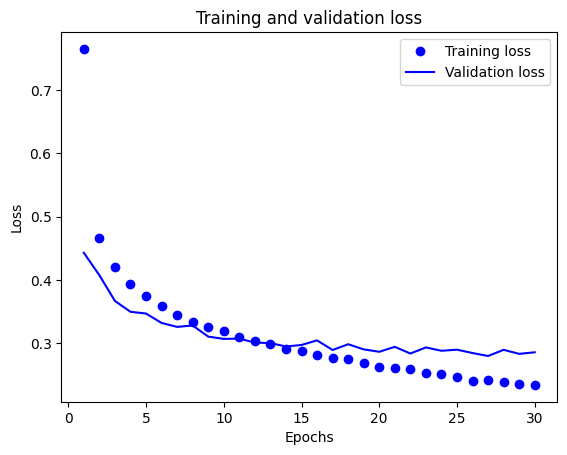

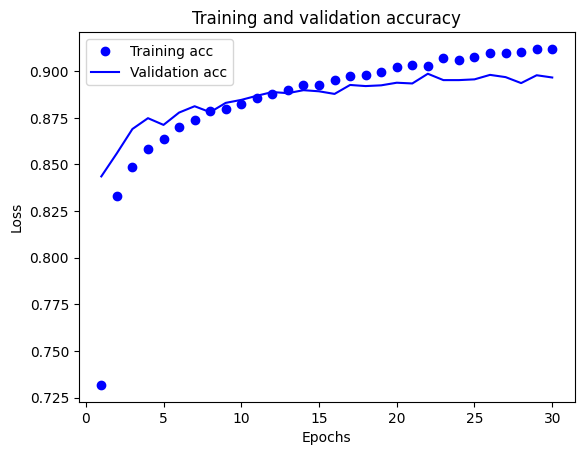

In [33]:
import matplotlib.pyplot as plt

model = create_model(activation=activation)

history = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_valid, y_valid))

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


З графіків можна зробити висновок, що оптимальна кількість епох = 14

__5. Вибір розміру батчу__

In [37]:
batch_size = [64, 128, 256, 512]

info = {}

for size in batch_size:
    model = create_model()
    model.fit(X_train, y_train, epochs=5,
              batch_size=size, validation_data=(X_valid, y_valid))
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    info.update({size: f': loss{test_loss}, accuracy{test_accuracy}'})

print(info)


Epoch 1/5
860/860 [==============================] - 18s 14ms/step - loss: 0.5880 - accuracy: 0.7916 - val_loss: 0.4058 - val_accuracy: 0.8490
Epoch 2/5
860/860 [==============================] - 11s 13ms/step - loss: 0.4242 - accuracy: 0.8462 - val_loss: 0.3430 - val_accuracy: 0.8762
Epoch 3/5
860/860 [==============================] - 11s 13ms/step - loss: 0.3848 - accuracy: 0.8611 - val_loss: 0.3440 - val_accuracy: 0.8756
Epoch 4/5
860/860 [==============================] - 11s 12ms/step - loss: 0.3634 - accuracy: 0.8659 - val_loss: 0.3210 - val_accuracy: 0.8804
Epoch 5/5
313/313 [==============================] - 3s 6ms/step - loss: 52.6150 - accuracy: 0.8479
Epoch 1/5
430/430 [==============================] - 12s 17ms/step - loss: 0.6364 - accuracy: 0.7738 - val_loss: 0.4095 - val_accuracy: 0.8540
Epoch 2/5
430/430 [==============================] - 6s 14ms/step - loss: 0.4304 - accuracy: 0.8446 - val_loss: 0.3642 - val_accuracy: 0.8700
Epoch 3/5
430/430 [========================

Оптимальний розмір батчу = 512

__6. Оптимальна кількість шарів__


In [41]:
layer = Dense(256, activation='relu')
info = {}

for i in range(4):
    list = [Dense(256, activation='relu',
                  input_shape=(784,)), Dropout(0.2)]
    for j in range(i):
        list.append(layer)
    list.append(Dense(10, activation='softmax'))

    model = Sequential(list)

    model.compile(optimizer='adam',
        loss = 'sparse_categorical_crossentropy',
        metrics = ['accuracy'])
    
    model.fit(X_train, y_train, epochs=5,
              batch_size=512, validation_data=(X_valid, y_valid))
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    info.update({i+1: f': loss{test_loss}, accuracy{test_accuracy}'})

print(info)



Epoch 1/5
108/108 [==============================] - 5s 34ms/step - loss: 0.7091 - accuracy: 0.7569 - val_loss: 0.4716 - val_accuracy: 0.8436
Epoch 2/5
108/108 [==============================] - 3s 32ms/step - loss: 0.4633 - accuracy: 0.8391 - val_loss: 0.4019 - val_accuracy: 0.8634
Epoch 3/5
108/108 [==============================] - 3s 32ms/step - loss: 0.4131 - accuracy: 0.8555 - val_loss: 0.3731 - val_accuracy: 0.8718
Epoch 4/5
108/108 [==============================] - 3s 32ms/step - loss: 0.3822 - accuracy: 0.8647 - val_loss: 0.3641 - val_accuracy: 0.8722
Epoch 5/5
313/313 [==============================] - 3s 6ms/step - loss: 49.1018 - accuracy: 0.8586
Epoch 1/5
108/108 [==============================] - 8s 52ms/step - loss: 0.6834 - accuracy: 0.7645 - val_loss: 0.4384 - val_accuracy: 0.8472
Epoch 2/5
108/108 [==============================] - 4s 40ms/step - loss: 0.4295 - accuracy: 0.8480 - val_loss: 0.3790 - val_accuracy: 0.8666
Epoch 3/5
108/108 [=============================

__Кінцева версія нейронної мережі__

In [42]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(784,)),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=14,
          batch_size=512, validation_data=(X_valid, y_valid))



Epoch 1/14
108/108 [==============================] - 11s 57ms/step - loss: 0.7058 - accuracy: 0.7545 - val_loss: 0.4347 - val_accuracy: 0.8494
Epoch 2/14
108/108 [==============================] - 4s 36ms/step - loss: 0.4435 - accuracy: 0.8415 - val_loss: 0.3762 - val_accuracy: 0.8690
Epoch 3/14
108/108 [==============================] - 4s 38ms/step - loss: 0.3885 - accuracy: 0.8597 - val_loss: 0.3481 - val_accuracy: 0.8764
Epoch 4/14
108/108 [==============================] - 5s 43ms/step - loss: 0.3650 - accuracy: 0.8664 - val_loss: 0.3474 - val_accuracy: 0.8708
Epoch 5/14
108/108 [==============================] - 4s 38ms/step - loss: 0.3451 - accuracy: 0.8736 - val_loss: 0.3274 - val_accuracy: 0.8810
Epoch 6/14
108/108 [==============================] - 4s 37ms/step - loss: 0.3248 - accuracy: 0.8804 - val_loss: 0.3127 - val_accuracy: 0.8864
Epoch 7/14
108/108 [==============================] - 3s 32ms/step - loss: 0.3101 - accuracy: 0.8863 - val_loss: 0.3123 - val_accuracy: 0.883

__Тестування__

In [46]:
fashion_mnist_labels = ['T-shirt/top', 'Trouser', 'Pullover',
                        'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


X_test = X_test.reshape(10000, 784)


predictions = model.predict(X_test)


num_samples = 20
random_indices = np.random.choice(len(X_test), num_samples, replace=False)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")


313/313 [==============================] - 2s 5ms/step - loss: 49.0890 - accuracy: 0.8633
Test loss: 49.08902359008789
Test accuracy: 0.8633000254631042


__Візуалізація результатів__

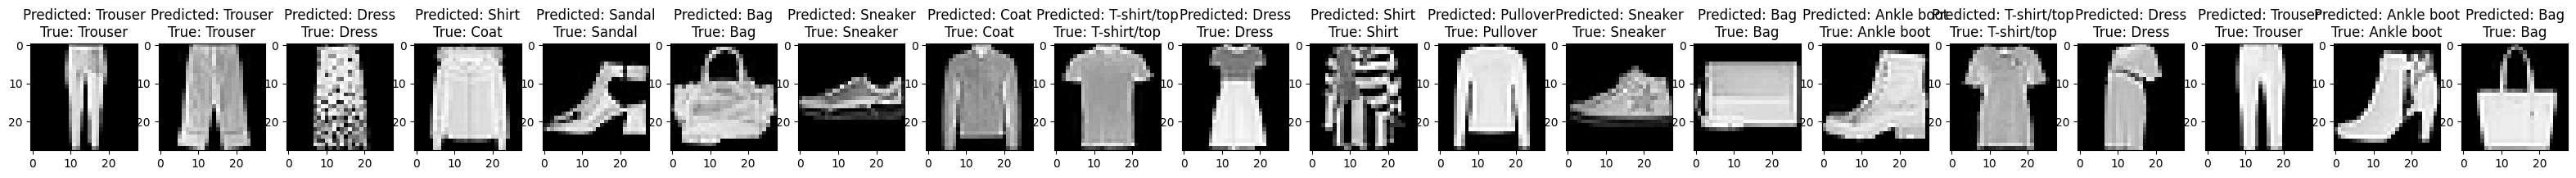

In [45]:
plt.figure(figsize=(40, 8))
for i, idx in enumerate(random_indices):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    predicted_label = fashion_mnist_labels[np.argmax(predictions[idx])]
    true_label = fashion_mnist_labels[y_test[idx]]
    plt.title(f'Predicted: {predicted_label}\nTrue: {true_label}')

plt.show()


На основі результатів тестування, можна зробити висновок, що данні гіперпараметри доволі добре підходять для навчання данної мережі так як на випадкових 20 зразках даних вона припустилась лише однієї помилки. Модель ще можна допрацювати, але в цьому немає великої необхідності так як результати доволі гарні для данного часу навчання